#### Data Analysis for Machine Learning


In [120]:
# importing necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn

#### load the data and understand the dataset

In [121]:
#loading data
house_df=pd.read_csv('train.csv')


In [122]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [123]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [124]:
house_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [125]:
house_df["PoolQC"]!=np.nan

0       True
1       True
2       True
3       True
4       True
        ... 
1455    True
1456    True
1457    True
1458    True
1459    True
Name: PoolQC, Length: 1460, dtype: bool

In [126]:
house_df["PoolQC"].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [127]:
# house_df.plot.scatter["PoolQC","SalePrice"]

<Axes: ylabel='Frequency'>

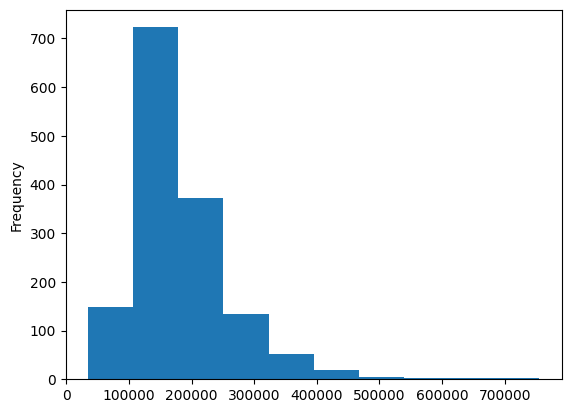

In [128]:
house_df["SalePrice"].plot.hist()

<Axes: xlabel='PoolQC'>

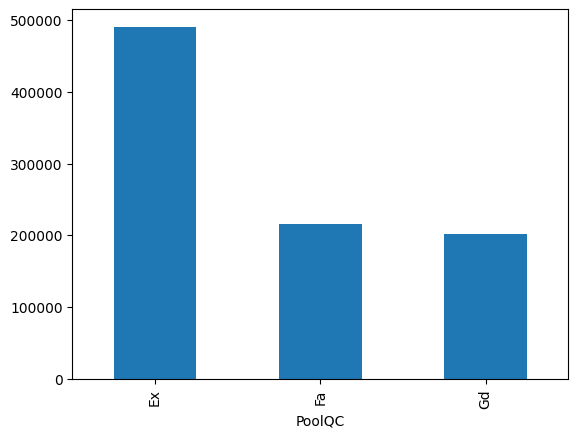

In [129]:
house_df.groupby("PoolQC")["SalePrice"].mean().plot.bar()

In [130]:
house_df["PoolQC"].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [131]:
house_df.drop(columns=["PoolQC"],inplace=True)

In [132]:
house_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,4,2010,WD,Normal,142125


In [133]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [134]:
#check the columns
house_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [135]:
house_df["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [136]:
house_df["Alley"].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

<Axes: xlabel='Alley'>

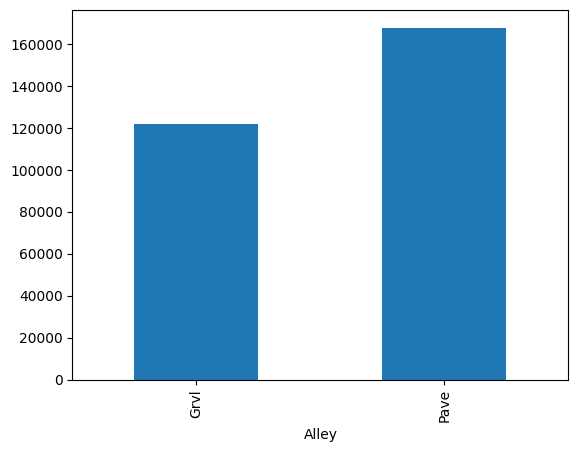

In [137]:
house_df.groupby("Alley")["SalePrice"].mean().plot.bar()

#### finding important features and columns


In [138]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [139]:
len(house_df.select_dtypes(include=["int64","float64"]).columns)

38

In [140]:
#create subset of the dataset of only the numeric columns
numeric_columns = house_df.select_dtypes(include=["int64","float64"])
corr_matrix=numeric_columns.corr()
print(corr_matrix.shape)


(38, 38)


In [141]:
corr_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<Axes: >

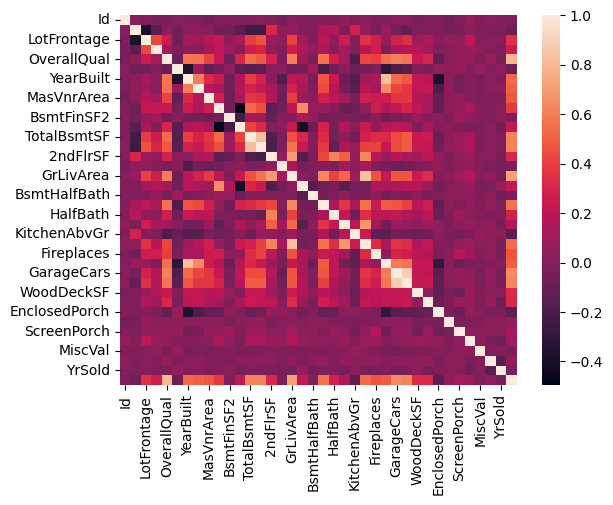

In [142]:
sns.heatmap(corr_matrix)

<Axes: >

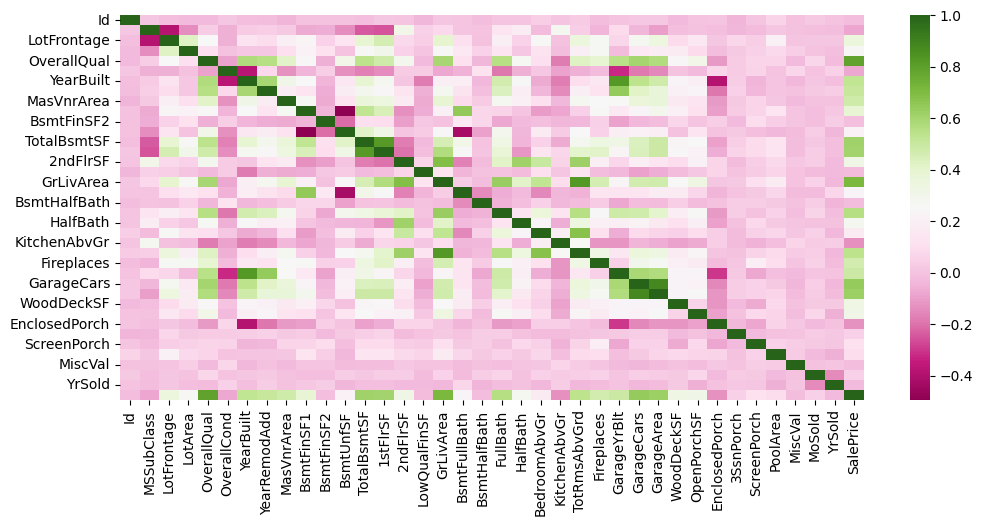

In [143]:
fig=plt.figure(figsize=(12,5))
sns.heatmap(corr_matrix,cmap="PiYG")


In [144]:
# important columns
imp_col=["MSSubClass","OverallQual","OverallCond","YearBuilt","MasVnrArea","TotalBsmtSF","1stFlrSF","LowQualFinSF","GrLivArea","FullBath","SalePrice"]
imp_col

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'SalePrice']

In [145]:
house_df[["GrLivArea","FullBath"]]

,GrLivArea,FullBath
0,1710,2
1,1262,2
2,1786,2
3,1717,1
4,2198,2
...,...,...
1455,1647,2
1456,2073,2
1457,2340,2
1458,1078,1


In [146]:
#subset of the dataset for the training
training_data=house_df[imp_col]

In [147]:
#split the data into input(X) and outpu(y)
#X-->multiple values
#y-->one single output
training_data

,MSSubClass,OverallQual,OverallCond,YearBuilt,MasVnrArea,TotalBsmtSF,1stFlrSF,LowQualFinSF,GrLivArea,FullBath,SalePrice
0,60,7,5,2003,196.0,856,856,0,1710,2,208500
1,20,6,8,1976,0.0,1262,1262,0,1262,2,181500
2,60,7,5,2001,162.0,920,920,0,1786,2,223500
3,70,7,5,1915,0.0,756,961,0,1717,1,140000
4,60,8,5,2000,350.0,1145,1145,0,2198,2,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,1999,0.0,953,953,0,1647,2,175000
1456,20,6,6,1978,119.0,1542,2073,0,2073,2,210000
1457,70,7,9,1941,0.0,1152,1188,0,2340,2,266500
1458,20,5,6,1950,0.0,1078,1078,0,1078,1,142125


In [148]:

X=training_data.drop(columns=["SalePrice"])
y=training_data["SalePrice"]

In [149]:
X_train=training_data.drop(columns=["SalePrice"])
y_train=training_data["SalePrice"]

In [150]:
# house_test_df=pd.read_csv("test.csv")
# house_test_df.head()


In [151]:
# test_data=house_test_df[imp_col]
# test_data

In [152]:
#split the data into training  and testing set
from sklearn.model_selection import train_test_split

In [153]:
#  train_test_split?

In [154]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=50)

In [155]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1022, 10)
(438, 10)
(1022,)
(438,)


In [156]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1022 entries, 175 to 109
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1022 non-null   int64  
 1   OverallQual   1022 non-null   int64  
 2   OverallCond   1022 non-null   int64  
 3   YearBuilt     1022 non-null   int64  
 4   MasVnrArea    1018 non-null   float64
 5   TotalBsmtSF   1022 non-null   int64  
 6   1stFlrSF      1022 non-null   int64  
 7   LowQualFinSF  1022 non-null   int64  
 8   GrLivArea     1022 non-null   int64  
 9   FullBath      1022 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 87.8 KB


In [157]:
X_train=X_train.drop(columns=["MasVnrArea"])
# y_train=y_train.drop(columns=["MasVnrArea"])

In [158]:
X_test=X_test.drop(columns=["MasVnrArea"])

In [159]:
from sklearn.linear_model import LinearRegression

In [160]:
#initiALISE
LR=LinearRegression()

In [161]:
LR.fit(X_train,y_train)

LinearRegression()

In [162]:
X_test.iloc[1:3]

,MSSubClass,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,LowQualFinSF,GrLivArea,FullBath
530,80,6,5,1988,1461,1509,0,1509,2
1291,160,5,7,1972,630,630,0,1302,2


In [163]:
y_test.iloc[1:3]

530     175000
1291    119500
Name: SalePrice, dtype: int64

In [164]:
LR.predict(X_test.iloc[1:3])

array([191965.35329566, 126369.09593773])

In [165]:
X_test.columns

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF',
       '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath'],
      dtype='object')

In [166]:
from sklearn.metrics import mean_absolute_error

In [167]:
# Prediction on the test data
pred_y_test = LR.predict(X_test)

In [168]:
#compare the real and the predicted values
list(zip(y_test, pred_y_test))

[(201000, 249549.79789264686),
 (175000, 191965.35329565872),
 (119500, 126369.09593772725),
 (125500, 96319.16941949422),
 (305900, 296668.33612917643),
 (200500, 192439.592839855),
 (168000, 159207.2561368344),
 (162000, 164291.48692353303),
 (174900, 161672.3850492118),
 (185000, 200727.41130485246),
 (117000, 133149.948341917),
 (155000, 178486.83174887951),
 (60000, -20226.315605836222),
 (172500, 162653.21926484583),
 (226700, 224011.1813086411),
 (232000, 241742.23958761012),
 (110000, 174802.192994589),
 (165150, 185794.52783351205),
 (314813, 302931.41814341024),
 (134000, 160241.30436244118),
 (260000, 217408.51887163287),
 (475000, 335125.0304799471),
 (89471, 105477.58512828057),
 (274970, 223525.49881280237),
 (127000, 144653.37453938904),
 (196000, 177946.59622697858),
 (220000, 247619.2747957199),
 (115000, 96521.73222546559),
 (350000, 308361.9277287363),
 (239000, 300475.717715085),
 (139000, 138672.41399061144),
 (128200, 125354.79741663183),
 (165400, 212548.82538199

In [169]:
mean_absolute_error(y_test, pred_y_test)

23222.962934424515

In [170]:
#calculate the mean  absolute % error
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,pred_y_test)

0.13591545068469488

In [171]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [172]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [173]:
house_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,0,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,1,2008,WD,Normal,118000


In [174]:
house_df["Utilities"].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [175]:
house_df.select_dtypes(include="object")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,TA,Attchd,Unf,TA,TA,Y,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Gd,Attchd,RFn,TA,TA,Y,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,WD,Normal


TypeError: 'DataFrame' object is not callable